In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR, SVC
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [5]:
# Load the dataset
df = pd.read_csv('/content/index.csv')

In [29]:
df.columns

Index(['cash_type', 'money', 'coffee_name', 'year', 'month', 'day', 'hour',
       'minute', 'second'],
      dtype='object')

In [6]:
# Convert datetime column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

In [7]:
# Extract features from datetime
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second

In [8]:
# Drop unnecessary columns
df.drop(['date', 'datetime', 'card'], axis=1, inplace=True)

In [9]:
# Encode categorical variables
le_cash_type = LabelEncoder()
df['cash_type'] = le_cash_type.fit_transform(df['cash_type'])

In [10]:
le_coffee_name = LabelEncoder()
df['coffee_name'] = le_coffee_name.fit_transform(df['coffee_name'])

In [11]:
# Define feature columns and target column
features = df.drop('money', axis=1)
target = df['money']

In [12]:
# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

**Support Vector Machine (SVM) - Regression**

In [14]:
# Train an SVR model
svr_model = SVR()
svr_model.fit(X_train, y_train)

SVR()

In [15]:
# Predict and evaluate the SVR model
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print("SVR Mean Squared Error:", mse_svr)

SVR Mean Squared Error: 18.665746527673885


**Long Short-Term Memory (LSTM)**

In [16]:
# Prepare data for LSTM
time_steps = 10
generator = TimeseriesGenerator(features_scaled, target, length=time_steps, batch_size=32)

# Define the LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, features_scaled.shape[1])),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

In [17]:
# Train the LSTM model
lstm_model.fit(generator, epochs=20)

Epoch 1/20
28/28 [==============================] - 4s 14ms/step - loss: 1143.7573
Epoch 2/20
28/28 [==============================] - 1s 19ms/step - loss: 638.4385
Epoch 3/20
28/28 [==============================] - 1s 23ms/step - loss: 343.6633
Epoch 4/20
28/28 [==============================] - 1s 21ms/step - loss: 209.5866
Epoch 5/20
28/28 [==============================] - 0s 15ms/step - loss: 135.7025
Epoch 6/20
28/28 [==============================] - 0s 14ms/step - loss: 105.4109
Epoch 7/20
28/28 [==============================] - 0s 14ms/step - loss: 94.8103
Epoch 8/20
28/28 [==============================] - 0s 11ms/step - loss: 87.2621
Epoch 9/20
28/28 [==============================] - 0s 11ms/step - loss: 74.7468
Epoch 10/20
28/28 [==============================] - 0s 9ms/step - loss: 57.9783
Epoch 11/20
28/28 [==============================] - 0s 9ms/step - loss: 52.4388
Epoch 12/20
28/28 [==============================] - 0s 8ms/step - loss: 49.9945
Epoch 13/20
28/28 [==

In [22]:
# Evaluate the LSTM model
# Calculate the correct start index to ensure consistent number of samples
start_index = len(features_scaled) - len(X_test)  # Correct start index
X_test_lstm = TimeseriesGenerator(features_scaled, target, length=time_steps, start_index=start_index)[0][0]
# Slice target to match X_test_lstm, accounting for time_steps
y_test_lstm = target[start_index + time_steps - 1: start_index + time_steps - 1 + len(X_test_lstm)]
y_pred_lstm = lstm_model.predict(X_test_lstm)
mse_lstm = mean_squared_error(y_test_lstm, y_pred_lstm)
print("LSTM Mean Squared Error:", mse_lstm)

4/4 [==============================] - 0s 11ms/step
LSTM Mean Squared Error: 33.18220780405984


**Support Vector Machine (SVM) - Classification**

In [24]:
# Convert y_train to discrete labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Train an SVC model using the encoded labels
svc_model = SVC()
svc_model.fit(X_train, y_train_encoded)

SVC()

**K-Means Clustering**

In [25]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [26]:
# Predict cluster for test data
y_pred_kmeans = kmeans.predict(X_test)

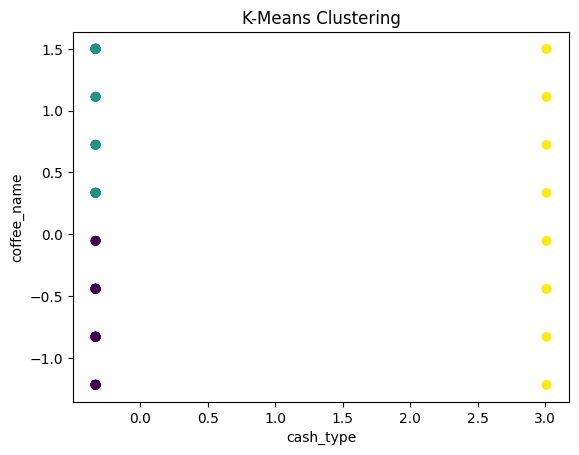

In [31]:
# Plot the clusters
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_kmeans, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('cash_type')
plt.ylabel('coffee_name')
plt.show()